In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

from src.HBTReader import HBTReader

%matplotlib notebook

/cosma/local/Python/2.7.3/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
snap = 13
reader = HBTReader("./data/GR_b64n512/subcat/")
haloes = reader.LoadHostHalos(snap)

<IPython.core.display.Javascript object>


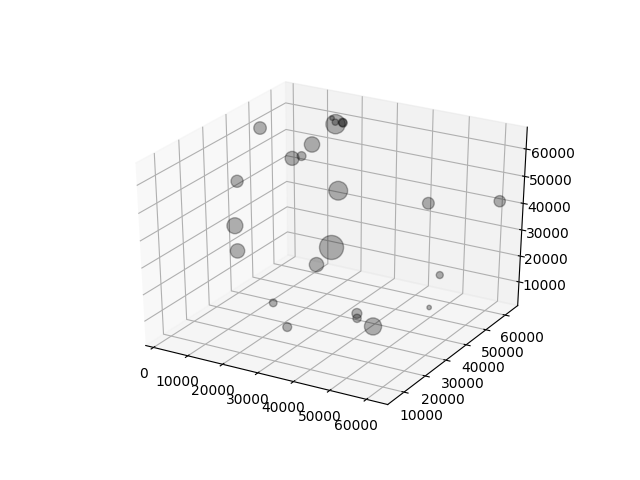

In [3]:
fig, ax = plt.subplots(1, subplot_kw={'projection': '3d'})

ax.scatter(
    *haloes['CenterComoving'].T,
    s=300*(haloes['M200Crit'] / haloes['M200Crit'].max()),
    c='k', alpha=0.3
)

In [4]:
def nearest_neighbour(halo, f=1.0, n=0):
    """n-th neighbour more massive then f*M (M of halo h).
    
    .. todo::

        Error handling for small numbers of haloes!

    """
    
    if halo['M200Crit'] == haloes['M200Crit'].max():
        r = 0.0

    else:
        _haloes = haloes[
            (haloes['HaloId'] != halo['HaloId']) &
            (haloes['M200Crit'] >= f*halo['M200Crit'])
        ]

        r = pd.DataFrame({
            'm': _haloes['M200Crit'] / halo['M200Crit'],
            'r': np.sqrt(np.sum(
                    np.power(
                        halo['CenterComoving'] -
                        _haloes['CenterComoving'], 2.0),
                    axis=1
                ))
        }).sort_values('r').iloc[n]['r'] / halo['R200CritComoving']

    return r

In [5]:
def spherical_overdensity(halo, r=5):
    """(Over)density within radius ``r`` of halo center.
    """
    return 0.0

def shell_overdensity(halo, r_min=1, r=5):
    """(Over)density within shell between ``r_min`` and ``r``.
    """
    return 0.0

In [6]:
def experienced_potential(halo):
    """Experienced gravity for a halo.
    """
    c = halo['NFW_c']
    r_s = nfw.r_s(c)
    delta_c = nfw.delta_c(c)

    rs = np.linspace(-2.0, 0.0, 100)
    phi = [phi(r) for r in rs]

    phi_star = phi + 4*np.pi*G*delta_c * cosmology.rho_crit(halo['snap']) * \
        np.div((r_s * r_s * r_s), rs) * np.log(1.0 + rs / r_s)

    return np.mean(phi_star)

In [7]:
[nearest_neighbour(halo) for halo in haloes]

[463.2017,
 902.53156,
 0.0,
 1031.7384,
 802.9057,
 836.2661,
 238.24825,
 718.7429,
 260.15338,
 12.380135,
 552.83606,
 411.34625,
 681.77167,
 12.380135,
 1143.9122,
 111.38487,
 390.6984,
 691.1078,
 204.55975,
 718.7676,
 660.5669,
 568.02795,
 178.56966,
 31.114162]